In [37]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset shape:", X.shape)
print("Features:\n", X.head())
print("Target variable:\n", y[:5])

Dataset shape: (20640, 8)
Features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target variable:
 [4.526 3.585 3.521 3.413 3.422]


## DecisionTreeRegressor

In [38]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:


#training and fitting the model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import mean_squared_error
y_pred = dt.predict(X_test) 

from sklearn.metrics import mean_absolute_error
mae = mean_squared_error(y_test, y_pred)
print("mean_squared_error: {:.2f}".format(mae))

mean_squared_error: 0.66


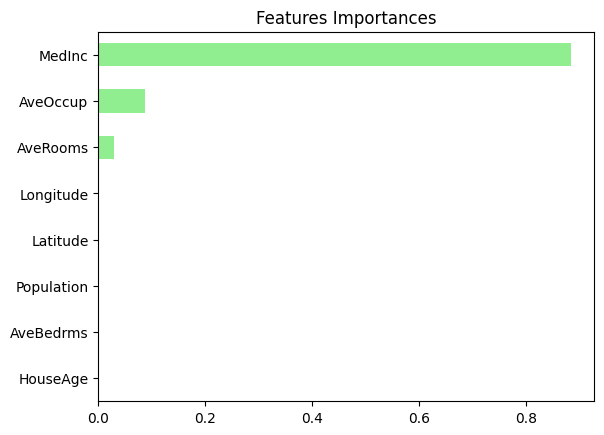

In [40]:
# important features
import matplotlib.pyplot as plt
importances = pd.Series(data=dt.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [41]:
#keeping important features

X_dt = X.drop(["Population", "AveBedrms","HouseAge", "Latitude","Longitude"], axis=1)
print(X_dt.columns)

Index(['MedInc', 'AveRooms', 'AveOccup'], dtype='object')


In [42]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.3, random_state=42)

In [43]:

from sklearn.model_selection import GridSearchCV
params_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

from sklearn.tree import DecisionTreeRegressor

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=params_dt,   
    cv=5,                
    n_jobs=-1            
)

grid_dt.fit(X_dt_train, y_dt_train) 

best_model = grid_dt.best_estimator_
print("Best Model:", best_model)

y_pred = best_model.predict(X_dt_test)

mse1 = mean_squared_error(y_dt_test, y_pred)
print("mean squared error: {:.2f}".format(mse1))


Best Model: DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.1, random_state=3)
mean squared error: 0.66


=> same result!

## RandomForestRegressor

In [44]:
#training and fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=25,
            random_state=2)   
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [45]:
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred)
print('Test set MSE of rf: {:.2f}'.format(mse2))

Test set MSE of rf: 0.27


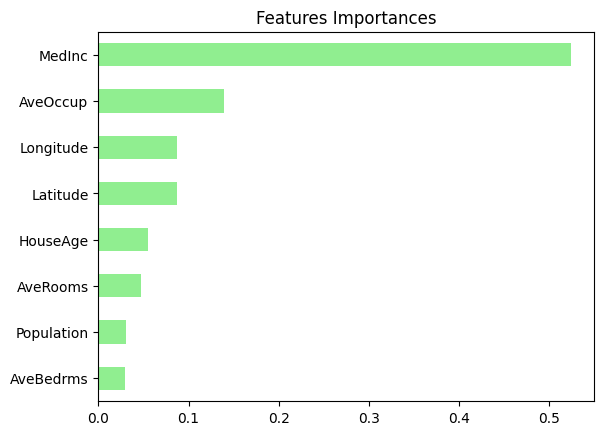

In [46]:
# important features
import matplotlib.pyplot as plt
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [47]:
#keeping important features
x_rf = X.drop(["Population", "AveBedrms","AveRooms","HouseAge"], axis=1)
print("new columns are:",x_rf.columns)

new columns are: Index(['MedInc', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')


In [48]:
# Splitting the data
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(x_rf, y, test_size=0.3, random_state=42)

In [49]:
rf = RandomForestRegressor(n_estimators=25, random_state=2)   
rf.fit(X_rf_train, y_rf_train)
from sklearn.metrics import mean_squared_error 
y_pred3 = rf.predict(X_rf_test)

mse3 = mean_squared_error(y_pred3, y_rf_test)
print('New  MSE of rf: {:.2f}'.format(mse3)) 

New  MSE of rf: 0.26


## AdaBoostRegressor

In [50]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(  n_estimators = 200, random_state = 1)

In [51]:
ada.fit(X_train,y_train)
y_pred4 = ada.predict(X_test)

In [52]:
# Evaluate test-set 
mse4 = mean_squared_error(y_pred4, y_test)
print('Test set RMSE of rf: {:.2f}'.format(mse4)) 

Test set RMSE of rf: 0.69


==> too high

## GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200,random_state=2)
gb.fit(X_train,y_train)
y_pred5 = gb.predict(X_test)

In [54]:
mse5 = mean_squared_error(y_pred5, y_test)
print('MSE of rf: {:.2f}'.format(mse5)) 

MSE of rf: 0.23


==> the lowest one 